# Analysis of iGRNA data from 20170215 

In [19]:
#This library needs to be installed first and it only works in python 2
from FlowCytometryTools import *

import os
#You will need to update where your base directory is
base_dir = 'C:\\Users\heine\github\AHN_FlowTools'
os.chdir(base_dir) 
from core import AHN_FlowTools
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from itertools import chain

sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline
#%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
#You will need to update your data directory
datadir = base_dir + os.path.normpath("/scripts/template/template_data/ahn20170215")+os.sep

allfiles = {}
plates = ['igRNA_t0','igRNA_t1','igRNA_t2']

for plate in plates: 
    filepath = datadir +  plate + os.sep +'*.fcs'
    files = glob.glob(filepath)
    assert len(files)>0, "No filenames recovered - check file path: " + filepath
    allfiles[plate] = files

In [5]:
rows = ['A','B','C','D','E','F','G','H']
cols = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [6]:
plateraw = pd.DataFrame(index = rows, columns = cols)
panelDict = {plate:plateraw for plate in plates}
allplates = pd.Panel(panelDict)

In [7]:
#assign files to plates using structure of the fcs filenames
for plate in plates:
    for f in allfiles[plate]:
        c = f[-6:-4]
        r = f[-7]
        call = r + c
        allplates[plate].set_value(r, c, FCMeasurement(ID = call, datafile = f))

In [20]:
FITCnorm = {}
mCherrynorm = {}
FITC = {}
mCherry = {}

for plate in plates: 
    [FITCnorm[plate], mCherrynorm[plate]] = AHN_FlowTools.FCdatastats(allplates[plate],normalized=True,rows=rows,cols=cols,FITCthresh=100,SSCthresh=1000)
    #These are the default arguments so could also run
    #[FITCnorm[plate], mCherrynorm[plate]] = AHN_FlowTools.FCdatastats(allplates[plate])
    [FITC[plate], mCherry[plate]] = AHN_FlowTools.FCdatastats(allplates[plate])
    

Data for row H and column 03 is nan occurred during FITC-H gating.  Either that well in the FITC-H channel on one of your plates has no data or if it is true for all wells, your filenames may be wrong.
Data for row H and column 06 is nan occurred during FITC-H gating.  Either that well in the FITC-H channel on one of your plates has no data or if it is true for all wells, your filenames may be wrong.
Data for row H and column 09 is nan occurred during FITC-H gating.  Either that well in the FITC-H channel on one of your plates has no data or if it is true for all wells, your filenames may be wrong.
Data for row H and column 12 is nan occurred during FITC-H gating.  Either that well in the FITC-H channel on one of your plates has no data or if it is true for all wells, your filenames may be wrong.
Data for row H and column 03 is nan occurred during FITC-H gating.  Either that well in the FITC-H channel on one of your plates has no data or if it is true for all wells, your filenames may 

In [21]:
FITCnorm['igRNA_t0'].med

,01,02,03,04,05,06,07,08,09,10,11,12
A,4.19137,3.90068,3.99856,3.95094,3.91896,3.70677,3.99827,3.93306,3.97644,3.94373,3.98242,3.98869
B,3.86444,3.9218,3.9118,3.82978,3.9039,19.6533,29.1354,27.6977,19.0969,18.3466,18.2889,18.7921
C,18.0084,18.4405,18.4814,17.8987,18.273,16.8362,18.9419,18.7376,18.6802,18.8703,19.0147,19.2632
D,18.4027,18.9662,18.6756,18.6283,18.8301,16.3239,19.5394,19.0936,19.0597,19.4307,18.9799,19.4919
E,19.25,18.9426,18.4368,19.0465,18.8026,16.9014,19.3446,19.759,19.5304,19.4013,19.3118,19.2706
F,20.0541,21.5989,21.1381,21.8997,20.3652,18.6452,15.1181,9.6309,8.05678,11.057,2.22588,1.94061
G,1.5784,4.09191,1.2158,2.17645,3.99391,4.15628,2.14286,28.7167,1.41896,1.00898,2.84293,4.04641
H,3.34024,1.09868,NaN,1.42264,68.79,NaN,1.88867,1.80646,NaN,2.54941,NaN,NaN


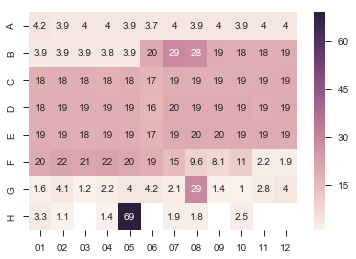

In [23]:
#Makes heatmap of FITCnorm for igRNA_t0 plate
sns.heatmap(FITCnorm['igRNA_t0'].med.iloc[0:8,0:12].astype(float), annot=True)


In [24]:
#Data frame for gfp targets with theophylline titration
layer_names = ['Target','Aptamer']
targets = ['gfp1','gfp2']
aptamers = ['on','MHF30','MHF37','RXB11','off']      
experiment_setup = [targets, aptamers]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
print(data_index.levels)
print(data_index.names)

[[u'gfp1', u'gfp2'], [u'MHF30', u'MHF37', u'RXB11', u'off', u'on']]
[u'Target', u'Aptamer']


In [25]:
AHN_FlowTools.view_or_input_exp_design(data_index)

print out list (1) or add wells one by one (2)1
['gfp1', 'on']
['gfp1', 'MHF30']
['gfp1', 'MHF37']
['gfp1', 'RXB11']
['gfp1', 'off']
['gfp2', 'on']
['gfp2', 'MHF30']
['gfp2', 'MHF37']
['gfp2', 'RXB11']
['gfp2', 'off']


C:\Users\heine\AppData\Local\Enthought\Canopy\edm\envs\bmh_python27\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: divide by zero encountered in log


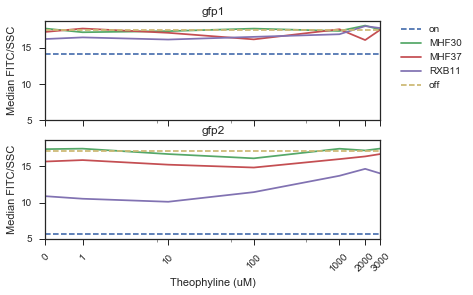

In [26]:
#Plot of median expression as theophylline dosage changes at time 2

#Make a dataframe with column for each dose of theophylline
concs = [0,1,10,100,1000,2000,3000]
rows = 'GFEDCBA'
columns = {'gfp1':['01','02','03'],'gfp2':['04','05','06']}
on_locs = {'gfp1': ('H','02'), 'gfp2':('H','05')}
off_locs = {'gfp1':('H','01'),'gfp2':('H','04')}

plate_locations = {}
for target in targets: 
    plate_locations_target = {}
    for jj,conc in enumerate(concs):
        plate_locations_target_conc = [on_locs[target]]
        row = rows[jj]
        for column in columns[target]:
            plate_locations_target_conc.append((row,column))
        plate_locations_target_conc.append(off_locs[target])
        plate_locations_target[conc] = plate_locations_target_conc
    plate_locations[target] = plate_locations_target

plate_locations

#input median normalized fitc into dataframe with multiindex for each column
FITCnorm_med = {}
for conc in concs: 
    FITCnorm_med_conc = []
    for target in targets:
        FITCnorm_med_conc.append([FITCnorm['igRNA_t2'].med.loc[loc[0]][loc[1]] for loc in plate_locations[target][conc]])
    
    FITCnorm_med[conc] = list(chain.from_iterable(FITCnorm_med_conc))

FITCnorm_med_df = pd.DataFrame(FITCnorm_med,index = data_index)

fig,ax = plt.subplots(2,1,sharex = True, sharey = True)
log_0 = -1.0 #Value to use to plot log of zero dose
new_columns = np.log(concs)
new_columns[0] = log_0

for jj,target in enumerate(targets): 
    FITCnorm_med_targ_df = FITCnorm_med_df.xs(target,level='Target')
    FITCnorm_med_targ_df.columns = new_columns
    FITCnorm_med_targ_df.T.plot(ax = ax[jj],legend=False,style = ['--','-','-','-','--'],title=target)
    ax[jj].set_xticks(new_columns)
    ax[jj].set_ylabel('Median FITC/SSC')

    
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].set_xlabel('Theophyline (uM)')
ax[1].set_xticklabels([str(conc) for conc in concs],rotation=45)



(0.0, 2.0)

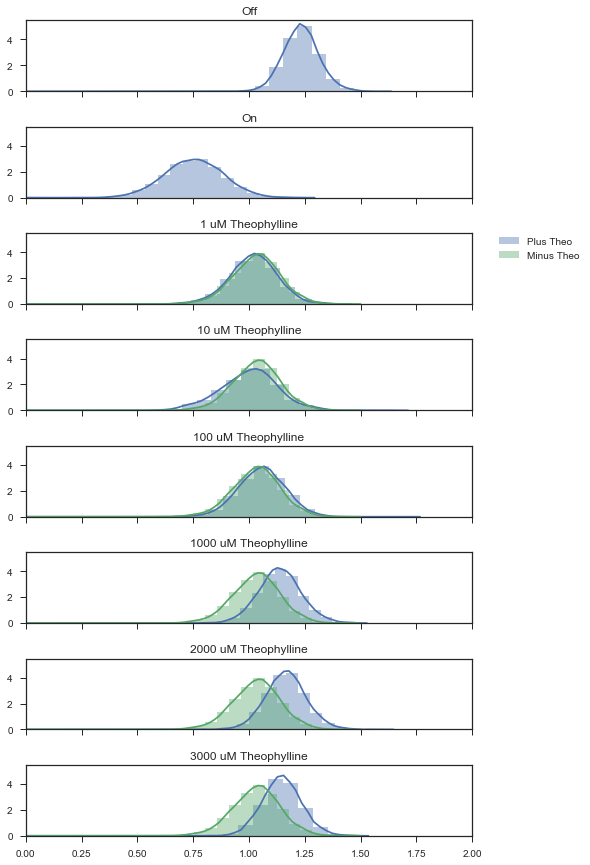

In [27]:
#Plot histogram in a column
#start with off, then on, then for each dose plot 0 and that dose on the same line

target = 'gfp2'
aptamer = 'RXB11'
aptamer_order = {'MHF30':0,'MHF37':1,'RXB11':2}
aptamer_column = columns[target][aptamer_order[aptamer]]

fig,ax = plt.subplots(8,1,sharex = True, sharey = True,figsize = (8,15))

#Off
loc = off_locs[target] 
sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc[0]][loc[1]]),ax = ax[0])
ax[0].set_title("Off")

#On
loc = on_locs[target] 
sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc[0]][loc[1]]),ax = ax[1])
ax[1].set_title("On")

for jj,conc in enumerate(concs[1:]):
    #first plot concentration of interest
    loc = (rows[1:][jj],aptamer_column)
    sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc[0]][loc[1]]),ax = ax[jj+2], label = 'Plus Theo')
    ax[jj+2].set_title(str(conc) + ' uM Theophylline')
    
    #then plot 0 concentration
    loc_0 = (rows[0],aptamer_column)
    sns.distplot(np.log10(FITCnorm['igRNA_t2'].raw.loc[loc_0[0]][loc_0[1]]),ax = ax[jj+2],label='Minus Theo')

ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.subplots_adjust(hspace=0.5)
ax[7].set_xlim([0.0,2.0])